In [108]:
import matplotlib.pyplot as plt

from ISLP import load_data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score

In [98]:
College = load_data('College')
College.head(20)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [99]:
College['Private'].unique()

array(['Yes', 'No'], dtype=object)

In [100]:
# Encode Private as 1 (Yes) or 0 (No)
ohe = OneHotEncoder()
r = ohe.fit_transform(College[['Private']])
College['Private'] = r.toarray()
College['Private'] = (College['Private'] == 0).astype('int')
College.head(20)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,1,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,1,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,1,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,1,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,1,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [101]:
# Separate X (predictors) and y (response)
X = College.drop('Apps', axis=1)
y = College['Apps']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=5
)

In [106]:
# Fit linear regression model to train, and evaluate in test
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test) # R^2 score

0.9080991554210214

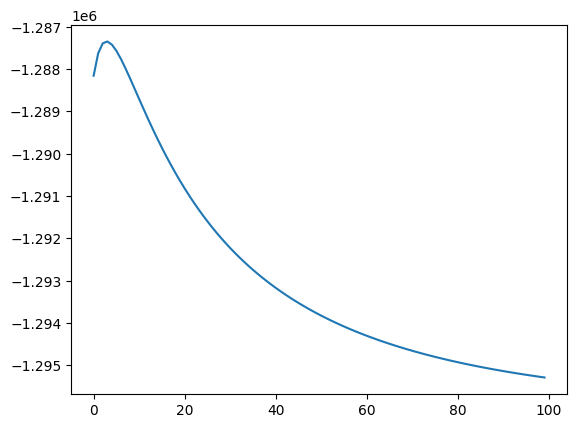

In [117]:
# Ridge

def mse(y_true, y_predicted):
    return sum([(a-b)**2 for a, b in zip(y_true, y_predicted)])

scores = []
for a in range(1, 500, 5):
    #ridge_clf = Ridge(alpha=a).fit(X_train, y_train)
    #scores.append(ridge_clf.score(X_test, y_test))
    ridge_clf = Ridge(alpha=a)
    scores.append(cross_val_score(ridge_clf, X, y, cv=10, scoring='neg_mean_squared_error').mean())

plt.plot(scores)